#  バンディットアルゴリズム(Bandit Algorithm)

In [7]:
%matplotlib inline
import numpy as np
from pandas import DataFrame
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [8]:
class Bandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.means = np.random.normal(loc=0.0, scale=1.0, size=self.arms)

    def select(self, arm):
        reward = np.random.normal(loc=self.means[arm], scale=1.0)
        return reward

In [9]:
def estimate_means(bandit, steps):
    rewards = {}
    for arm in range(bandit.arms):
        rewards[arm] = []
    for _ in range(steps):
        arm = np.random.randint(bandit.arms)
        reward = bandit.select(arm)
        rewards[arm].append(reward)

    averages = []
    for arm in range(bandit.arms):
        averages.append(sum(rewards[arm]) / len(rewards[arm]))

    return averages

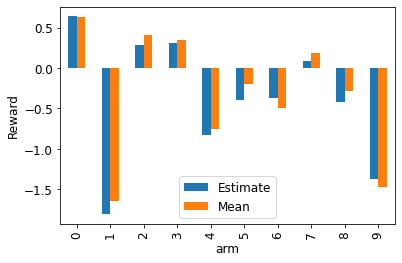

In [10]:
bandit = Bandit()
estimates = estimate_means(bandit, steps=1000)

ax = DataFrame({'Estimate': estimates, 'Mean': bandit.means}).plot(kind='bar')
_ = ax.set_xlabel('arm')
_ = ax.set_ylabel('Reward')

In [11]:
def get_action(qs, epsilon):
    if np.random.random() < epsilon:
        # Explore: chooose randomly
        return np.random.randint(len(qs))
    else:
        # Exploit choose the arm with the max average
        return np.argmax(qs)

In [12]:
def episode(bandit, epsilon, steps):
    total_rewards = [0]
    qs = [0] * bandit.arms
    count = [0] * bandit.arms

    for _ in range(steps):
        arm = get_action(qs, epsilon)
        reward = bandit.select(arm)
        total_rewards.append(total_rewards[-1] + reward)

        count[arm] += 1
        qs[arm] += (reward - qs[arm]) / count[arm]

    return total_rewards

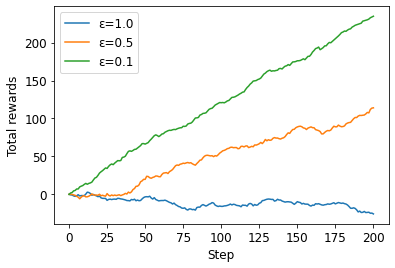

In [48]:
bandit = Bandit()
rewards = {}
for epsilon in [1.0, 0.5, 0.1]:
    rewards['ε={}'.format(epsilon)] = episode(bandit, epsilon, steps=200)

ax = DataFrame(rewards).plot()
_ = ax.set_xlabel('Step')
_ = ax.set_ylabel('Total rewards')

In [49]:
def hypertune(values, num_samples):
    rewards = {}
    for epsilon in values:
        scores = []
        for _ in range(num_samples):
            bandit = Bandit()
            result = episode(bandit, epsilon, steps=200)
            scores.append(result[-1])
        rewards['{:1.1f}'.format(epsilon)] = scores

    ax = DataFrame(rewards).plot(kind='box')
    _ = ax.set_xlabel('ε')
    _ = ax.set_ylabel('Total rewards')

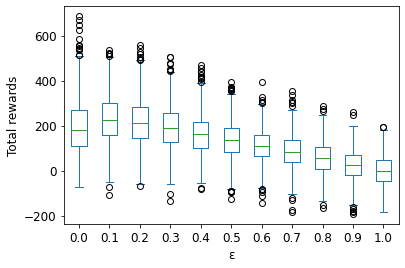

In [50]:
hypertune(np.linspace(0, 1.0, 11), num_samples=1000)